# Prediction of Bitcoin Price one week into the future.
## Linear Regression Model

I will load the historical Bitcoin price data from a CSV file, train a linear regression model on the data and then uses the trained model to predict the price of Bitcoin one week into the future.

First I updated the file for the CSV that contain the Data for Bitcoin. I got the Data from the website CoinMarketCap in the CSV format, this file contain the dataset with 3616 rows and 7 columns, Dates start in 28/04/2013 - 22/03/2023 and have values of Date, Open Price, High, Low, Close Price, Volume and Market Capitalization. 

Import the libraries that we will need. (pandas, numpy, and LinearRegression from scikit-learn) and loads the Bitcoin price data from the CSV file into a pandas DataFrame.


In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data from the CSV file into a pandas DataFrame
df = pd.read_csv('./Bitcoin_updated - Bitcoin.csv')

df['Open'] = df['Open'].str.replace('[^\d\.]', '', regex=True)
df['High'] = df['High'].str.replace('[^\d\.]', '', regex=True)
df['Low'] = df['Low'].str.replace('[^\d\.]', '', regex=True)
df['Close'] = df['Close'].str.replace('[^\d\.]', '', regex=True)
df['Volume'] = df['Volume'].str.replace('[^\d\.]', '', regex=True)
df['Market Cap'] = df['Market Cap'].str.replace('[^\d\.]', '', regex=True)

df[['Open', 'High','Low','Close','Volume','Market Cap']] = df[['Open', 'High','Low','Close','Volume','Market Cap']].astype(float)
#df = df.sort_values(by="Date", ascending=True)

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        3616 non-null   object 
 1   Open        3616 non-null   float64
 2   High        3616 non-null   float64
 3   Low         3616 non-null   float64
 4   Close       3616 non-null   float64
 5   Volume      3616 non-null   float64
 6   Market Cap  3616 non-null   float64
dtypes: float64(6), object(1)
memory usage: 197.9+ KB


,Date,Open,High,Low,Close,Volume,Market Cap
0,"mar 22, 2023",28158.72,28803.34,26760.00,27307.44,3.338202e+10,5.277206e+11
1,"mar 21, 2023",27768.39,28439.56,27439.65,28175.82,3.610219e+10,5.444733e+11
2,"mar 20, 2023",28041.60,28527.72,27242.88,27767.24,4.477403e+10,5.365531e+11
3,"mar 19, 2023",26969.50,28440.56,26907.72,28038.67,3.776945e+10,5.417713e+11
4,"mar 18, 2023",27448.12,27725.95,26636.26,26965.88,3.572304e+10,5.210184e+11
...,...,...,...,...,...,...,...
3611,"may 02, 2013",116.38,125.60,92.28,105.21,0.000000e+00,1.168517e+09
3612,"may 01, 2013",139.00,139.89,107.72,116.99,0.000000e+00,1.298955e+09
3613,"Apr 30, 2013",144.00,146.93,134.05,139.00,0.000000e+00,1.542813e+09
3614,"Apr 29, 2013",134.44,147.49,134.00,144.54,0.000000e+00,1.603769e+09


As we see that the df doesn't have any missing values, we will continue with converting the 'Date' column, to a datetime object and sort the DataFrame by date in ascending order.

In [7]:
# Convert the date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data by date in ascending order
df = df.sort_values('Date')

Create the feature matrix X and the target vector y. The feature matrix contains only the 'Close' column of df, and the target vector is created by shifting the 'Close' column up by one week using the shift method. The reshape method is used to ensure that X and y have the correct shape for use with scikit-learn's LinearRegression model.

"Linear" refers to the fact that the model assumes a linear relationship between the independent variables (the closing price of Bitcoin) and the dependent variable (the Bitcoin price one week into the future).

In [8]:
# Use only the closing price column for the analysis
X = np.array(df['Close']).reshape(-1, 1)

# Create the target variable by shifting the closing price column up by one week
y = np.array(df['Close'].shift(-7)).reshape(-1, 1)

Splits the data into training and testing sets using an 80/20 split. train_size is calculated as 80% of the total length of X, and the data is split into X_train (the first 80% of X) and X_test (the remaining 20% of X). The same split is applied to y to create y_train and y_test.

In [9]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

Creates a LinearRegression object called lr and fits it to the training data using the fit method.

In [10]:
# Fit the linear regression model to the training data
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

I used the trained linear regression model to make predictions on the testing data (X_test) using the predict method.

In [11]:
# Make predictions on the testing data
predictions = lr.predict(X_test)

Prints out the coefficients and intercept of the linear regression model.

In [12]:
# Print the coefficients and intercept of the linear regression model
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)

Coefficients: [[1.03546429]]
Intercept: [-47.97558918]


Finally, I use the trained model to predict the price of Bitcoin one week into the future. It first retrieves the last known price of Bitcoin from df, then uses the predict method of the trained model to make the prediction.

In [13]:
# Predict the closing price of Bitcoin one week into the future
last_price = df['Close'].iloc[-1]
next_week_prediction = lr.predict([[last_price]])[0][0]
print('Next week prediction:', next_week_prediction)

Next week prediction: 28227.903434518135


Now we can graphic the results.

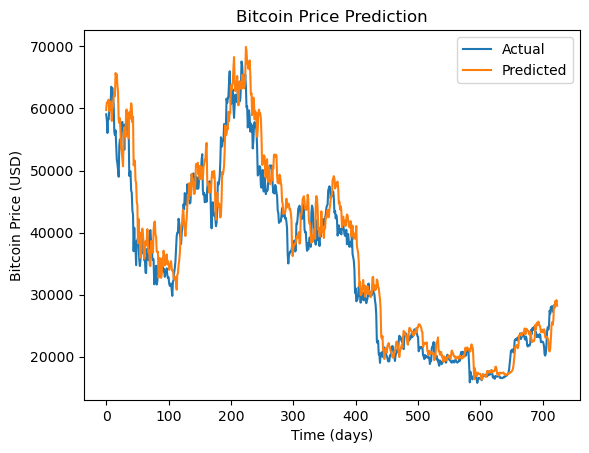

In [3]:
# Plot the predicted prices and the actual prices
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time (days)')
plt.ylabel('Bitcoin Price (USD)')
plt.title('Bitcoin Price Prediction')
plt.legend()
plt.show()


As we can see, the Current prices and the Predicted Prices follow a linear pattern, that shows that this model have an accurate prediction of Future Prices, this is a really difficult thing to do I can say, as I try different ways to get the results the best that I could, some times my graphics and the model was giving me back prices that was wrong, but eventually I got this done. 

One important point to be consider is that the cryptocurrency market is highly volatile, and past performance may not necessarily indicate future returns.